Modified code from Chapter 10 of Machine Learning: An Algorithmic Perspective by Stephen Marsland (http://seat.massey.ac.nz/personal/s.r.marsland/MLBook.html)

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Exercise 1: Complete the code for LDA

In [2]:
def LDA(data,labels,redDim): #redDim should be at most the number of classes - 1
    # Centre data
    data -= data.mean(axis=1).reshape(-1,1)
    nDim = data.shape[0]
    nData = data.shape[1]
    
    Sw = np.zeros((nDim,nDim))
    Sb = np.zeros((nDim,nDim))
    
    C = np.cov(data)
    
    # Loop over classes
    classes = np.unique(labels)
    
    for i in range(len(classes)):
        # Find datapoints for class i
        indices = np.squeeze(np.where(labels==classes[i]))
        d = np.squeeze(data[:,indices])
        classcov = np.cov(d)
        Sw += float(indices.shape[0])/nData * classcov
        
    Sb = C - Sw
    # Compute eigenvalues, eigenvectors and sort into order
    #evals,evecs = linalg.eig(np.dot(linalg.pinv(Sw),sqrt(Sb)))  #this is a bad example!
    evals,evecs = la.eig(Sw,Sb)
    indices = np.argsort(evals)
    indices = indices[::-1]
    evecs = evecs[:,indices]
    evals = evals[indices]
    w = evecs[:,:redDim]
    
    SwZ = np.diag(np.dot(w.T, Sw).dot(w))  #normalized in terms of with-class variance (this is VERY important!)
    w = np.dot(w, np.diag(np.reciprocal(np.sqrt(SwZ))))
    #print evals, w
    
    newData = np.dot(w.T,data)
    return newData,w

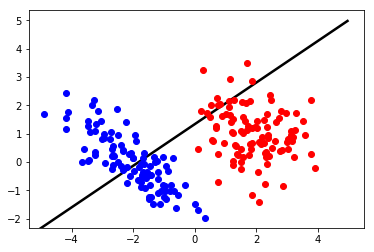

In [3]:
nPerClass=100
data1 = np.dot([[1,-0.2],[-0.2,1]],np.random.randn(2,nPerClass))+[[2],[1]]
data2 = np.dot([[1,-0.5],[-0.5,1]],np.random.randn(2,nPerClass))+[[-2],[0]]
data = np.concatenate((data1,data2),axis=1)
labels = np.concatenate((np.zeros(nPerClass),np.ones(nPerClass)))
newData,w = LDA(data,labels,1)

plt.plot(data1[0,:],data1[1,:],'o',color='red')
plt.plot(data2[0,:],data2[1,:],'o',color='blue')
plt.quiver(5, 5, w[0,0],w[1,0],angles='xy',scale_units='xy', scale=0.01) #Uncomment here when ready.
plt.show()

No, compare it with PCA.

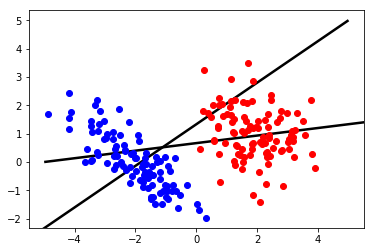

In [4]:
def PCA(X): #we assume that sample is given in column-wise manner
    covMat = np.cov(X)
    eigVals,eigVects = np.linalg.eig(covMat)
    eigValInd = np.argsort(-eigVals)        #sort in descending order
    eigVects = eigVects[:,eigValInd]       #reorganize eigen vectors 
    return eigVals, eigVects

eigVals, eigVects = PCA(data)
plt.plot(data1[0,:],data1[1,:],'o',color='red')
plt.plot(data2[0,:],data2[1,:],'o',color='blue')
plt.quiver(-5, 0, eigVects[0,0],eigVects[1,0],angles='xy',scale_units='xy', scale=0.01) #PCA axis
plt.quiver(5, 5, w[0,0],w[1,0],angles='xy',scale_units='xy', scale=0.01) #LDA axis
plt.show()